# Assignment #2 - Classification



<font color="blue"> Rohan Bhosale </font>

# I. Introduction

In this assignment we will be learning about Classification and will be implementing different calssification algorithms like Pocket Algorithm, Quadratic Discriminant Analysis Algorithm, Linear Discriminant Algorithm and Logistic Regression Algorithm. We will be implementing these algorithms using libraries Numpy and matplotlib only.Implementing these algorithms and visualizing them will give us a fair idea about how these algorithms work, and how good are they with the predictions. Also we understand the difference between the working of these algorithms.We will be implementing 5 codes one for superclass and rest 4 for the Classification algorithms. superclass has multiple abstract methods which will be referenced ahead, Pocket Class, QDAclass, LDAclass and LogisticRegression class will have the actual code for these algorithms where we will calculate weights and train the model.

# II. Data
I am using 'WeatherAUS.csv' as my data for classification this data has 142k entries and has 24 coloumns. This dataset has weather data of different parts of Australia, basically this data is used for Rainfall pridiction in those parts of Australia. This data is collected from diffrent asutralian weather stations. 24 coloumns in this data set give us enough information to predict if there will be rainfall tomorrow, which is our target vairable. It is advised by the dataset creators that we should exclude the RISK_MM coloumn data while Training a modle As we are directly giving  model the answer which inturn will reduce the efficiency of the model. the coloumns in the data set are: <br><br>

<br> 1.Date: The date of observation <br>
2.Location:  The common name of the location of the weather station<br>
3.MinTemp:   The minimum temperature in degrees celsius<br>
4.MaxTemp:   The maximum temperature in degrees celsius<br>
5.Rainfall:  The amount of rainfall recorded for the day in mm<br>
6.Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
7.Sunshine:  The number of hours of bright sunshine in the day.<br>
8.WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight<br>
9.WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
10.WindDir9am:  Direction of the wind at 9am<br>
11.WindDir3pm:  Direction of the wind at 3pm<br>
12.WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
13.WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
14.Humidity9am:  Humidity (percent) at 9am<br>
15.Humidity3pm:  Humidity (percent) at 3pm<br>
16.Pressure9am:  Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
17.Pressure3pm:  Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
18.Cloud9am:     Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records                  how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8                        indicates that it is completely overcast.<br>
19.Cloud3pm:     Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the                          values<br>
20.Temp9am:          Temperature (degrees C) at 9am<br>
21.Temp3pm:          Temperature (degrees C) at 3pm<br>
22.RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
23.RISK_MM:          The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the                      "risk".<br>
24.RainTomorrow:     The target variable. Did it rain tomorrow?<br><br>

From the above list of coloumns we can predict few vey important aspects that can lead to rainfall which are MinTemp, MaxTemp, Evaporation, Humidity9am, Humidity3pm, Pressure9am, pressure3pm, RISK_MM, Rainfall,RainTomorrow. These are the main values which will actually help us predict if there will be rainfall tomorrow or not.

### 1.Reading data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
Cdata=pd.read_csv("weatherAUS.csv")

In [4]:
Cdata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44,W,...,22,1007.7,1007.1,8,0,16.9,21.8,0,0.0,0
1,02/12/2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44,NNW,...,25,1010.6,1007.8,0,0,17.2,24.3,0,0.0,0
2,03/12/2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46,W,...,30,1007.6,1008.7,0,2,21.0,23.2,0,0.0,0
3,04/12/2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24,SE,...,16,1017.6,1012.8,0,0,18.1,26.5,0,1.0,0
4,05/12/2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41,ENE,...,33,1010.8,1006.0,7,8,17.8,29.7,0,0.2,0
5,06/12/2008,Albury,14.6,29.7,0.2,0.0,0.0,WNW,56,W,...,23,1009.2,1005.4,0,0,20.6,28.9,0,0.0,0
6,07/12/2008,Albury,14.3,25.0,0.0,0.0,0.0,W,50,SW,...,19,1009.6,1008.2,1,0,18.1,24.6,0,0.0,0
7,08/12/2008,Albury,7.7,26.7,0.0,0.0,0.0,W,35,SSE,...,19,1013.4,1010.1,0,0,16.3,25.5,0,0.0,0
8,09/12/2008,Albury,9.7,31.9,0.0,0.0,0.0,NNW,80,SE,...,9,1008.9,1003.6,0,0,18.3,30.2,0,1.4,1
9,10/12/2008,Albury,13.1,30.1,1.4,0.0,0.0,W,28,S,...,27,1007.0,1005.7,0,0,20.1,28.2,1,0.0,0


### 2.Irrelevent Data:<br>
1.Date<br>
2.Location<br>
3.WindDir9am<br>
4.WindDir3pm<br>
5.Cloud9am<br>
6.Cloud3pm<br>
7.Temp9am<br>
8.Temp3pm<br><br>
For now we just want to predict if it will rain tomorrow or not we can consider Location as an irrelevent data, if we start predicting rainfall according to location, then Location would be a relevent data. We are considering Temp9am and Temp 3pm as irrelevent because we have already noted Max amd min tempratures so it would be okay if we do not nothe this data. 

### iii Visualization of Data: <br>
Data visualization is the representation of data and information with the help of graphs, charts, and maps. So let us start to visualize out data and find different relations between them. As our target value can be considered to be RainTomorrow we can start finding the relations between different coloumns which will lead us to our prediction of rain fall tomorrow.

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


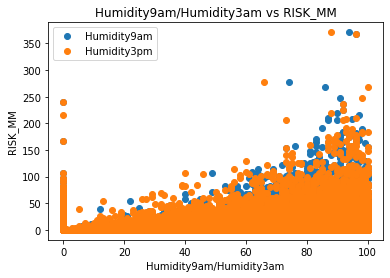

In [5]:
plt.plot(Cdata.Humidity9am, Cdata.RISK_MM,'o')
plt.plot(Cdata.Humidity3pm,Cdata.RISK_MM,'o')
plt.title("Humidity9am/Humidity3am vs RISK_MM")
plt.xlabel("Humidity9am/Humidity3am")
plt.ylabel("RISK_MM")
plt.legend(["Humidity9am","Humidity3pm"])
plt.show()

Here we can observe that as the value of humidity increases, there is a gradual increase in RISK_MM too, RISK_MM is the value which predicts if it will rain tomorrow or not so, if we see a increase in RISK_MM value with increase in Humidity values it means Higher the humidity more are the chances of a Rain fall.

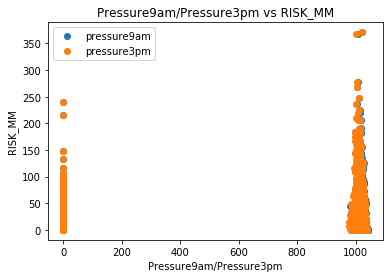

In [6]:
plt.plot(Cdata.Pressure9am, Cdata.RISK_MM,'o')
plt.plot(Cdata.Pressure3pm,Cdata.RISK_MM,'o')
plt.title("Pressure9am/Pressure3pm vs RISK_MM")
plt.xlabel("Pressure9am/Pressure3pm")
plt.ylabel("RISK_MM")
plt.legend(['pressure9am','pressure3pm'])
plt.show()

Here we can observe that a larger chunk of data lies around pressure value 1000 with high values of RISK_MM, lookig at this graph we can say that it will rain when the pressure conditions are appropriate i.e there are more chances of rain between the values 1000-1030 than the values outside of this bound. So we can say that Pressure and Humidity directly affect on the RISK_MM values which indeed predicts the Rainfall for tomorrow.

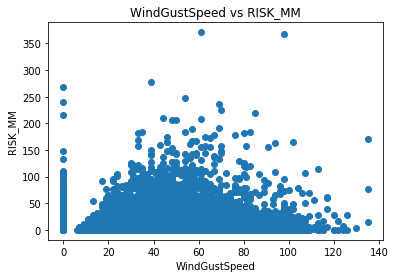

In [7]:
plt.plot(Cdata.WindGustSpeed,Cdata.RISK_MM,'o')
plt.title("WindGustSpeed vs RISK_MM")
plt.xlabel("WindGustSpeed")
plt.ylabel("RISK_MM")
plt.show()

This is the graph of WindGustSpeed vs RISK_MM, where we can see a large chunk of data at lower values of 'WindGustSpeed'. This means that if the wind speed is low there are more chances of rain. We can say If there is less wind it wont blow away the clouds, resulting in more chances of rain.

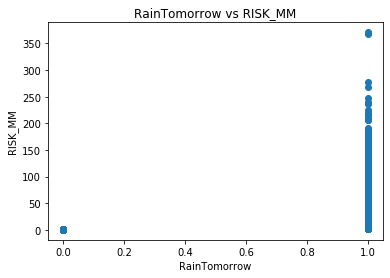

In [8]:
plt.plot(Cdata.RainTomorrow,Cdata.RISK_MM,'o')
plt.title("RainTomorrow vs RISK_MM")
plt.xlabel("RainTomorrow")
plt.ylabel("RISK_MM")
plt.show()

This graph explains the relation between the Coloumn RISK_MM amd RainTomorrow. We can see that RainTomoeeow has 2 values 'Yes', 'No'. It can be inferred from the data and graph that for values 1 or less than one in RISK_MM there will be No Rain, but for the values more than 1 in RISK_MM it will rain tomorrow. We can say that 'No'on x-axis corrosponds to valies equal to 1 ore less than one of RISK_MM, value 'Yes' corrosponds to values more than 1 in RISK_MM. 

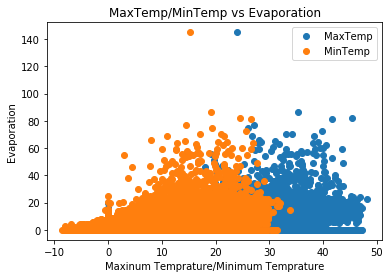

In [9]:
plt.plot(Cdata.MaxTemp,Cdata.Evaporation, 'o')
plt.plot(Cdata.MinTemp,Cdata.Evaporation, 'o')
plt.title("MaxTemp/MinTemp vs Evaporation")
plt.xlabel("Maxinum Temprature/Minimum Temprature")
plt.ylabel("Evaporation")
plt.legend(['MaxTemp','MinTemp'])
plt.show()

Here we can see a gradual increase in humiditu=y levels with increase in temprature. We can say that as the temprature increases the ecaporatin also increases which may lead to more humidity in climate thus resulting in rain.

### iv. Priliminary Observations <br>
From the above graphs and data we can infer that there are many different conditions which are affecting each other which results in the value for RISK_MM and the prediction of RainTomorrow coloumn we saw a gradual increase in evaporation with increase in temprature, we also observed a increase in RISK_MM values with increase in Humidity. These 2 cam be considered as main factors affectinf rain. We also Saw how pressure and Wind conditions affect the RISK_MM  values which indirectly affect the prediction for rain. The main observation cam be said to be between RISK_MM and RaonTomorrow values i.e it will only rain if RISK_MM value is more that One it wont rain if the value os one ore less than one.<br>

# III. Method

### 1.Pocket Algorithm
The Perceptron Learning Algorithm is one of the simplest machine learning algorithms and a crucial building block of more complex machine learning and deep learning models.  A simple modification of this algorithm is termed the Pocket Learning Algorithm. perceptron algorithm applies a step function on the linear output. For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. But pocket algorithm keeps the best solution soo far in its pocket thus giving us better results and a easier way to classify.In other word we can also say that  pocket algorithm is a perceptron learning algorithm with a memory which keeps the result of the iteration. Pocket algorithm is also considered able to provide for any classification problem the weight vector which satisfies the maximum number of input-output relations contained in the training set. Pocket algorithm works well with nonseparable or even contradictory training instances.<br>
Equation to calculate weights in Pocket Algorithm:
$$w^{(k+1)}=w^{(k)}+αt_ix_i.$$

### 2. Quadratic Discriminant Analysis 

A quadratic classifier is used in machine learning and statistical classification to separate measurements of two or more classes of objects or events by a quadric surface. It is a more general version of the linear classifier. Quadratic discriminant analysis (QDA) is closely related to linear discriminant analysis (LDA), where it is assumed that the measurements from each class are normally distributed. Unlike LDA however, in QDA there is no assumption that the covariance of each of the classes is identical. When the normality assumption is true, the best possible test for the hypothesis that a given measurement is from a given class is the likelihood ratio test. <br>
Equations for Quadratic Discriminant Analysis :<br>
1.$$δ_k(x)=(−1/2)ln|Σ_k|−1/2(x−μ_k)^⊤Σ^{−1}_k(x−μ_k)+ln(P(T=k)).$$

2. for a new sample x~, we can predict the label with

$$y=argmax_kδk_(x~).$$

### 2. Linear Discriminant Analysis (LDA)<br>

Maintaining the covariance matrix is not cheap. Also, the data is undersampled, the resulting class boundary has high chance of overfitting. These problems can be solved using Linear Discriminant Analysis(LDA),and we can reach  Linear Discriminant Analysis simply by using the same covariance for all the classes.<br>
Equations for Linear Discriminant Analysis:<br>
1.$$δ_k(x)=x^⊤Σ^{−1}μ_k−1/2{μ^⊤}_kΣ^{−1}μ_k+ln(P(T=k)).$$<br>
2. In many cases, for simple computation, the covariance matrix Σ is chosen as an average of all the covariance matrices for all classes,

$$Σ=∑_k^K(N_k/N)Σ_k.$$

### 4.Logistic Regression <br>
Logistic Regression algorithm is an regression algorithm which can be used as an classification algorithm. It is commonly used to estimate the probability that an instance belongs to a particular class.If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier. A Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.<br>Equation:
$$ p = h_θ(X) = σ(θ^T·x) $$

### A. Super Classs Definition

In [10]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

#### Code Explaination:
Class Basemodel sepcifies 2 abstract methods train and use where train method takes 3 arguments and use method takes 2 arguments, any class that extends BaseModel class will have to provide implementation for these 2 methods. In this code class Classifier extends BaseModel so it provides implementation for methods train and use but it also provides 4 more methods which are '__init__', 'normalize, 'check_matrix' and 'add_ones'. init method is used to initialize variables, normalize method is used to normalize the data by substracting the data with the mean and dividing with standard deviation we will use it on the data tha we will be passing to our algorithms, check_method is used to check the shape of the matrix and method add_ones is used to add a bais to a matrix that we want.  

### B. Pocket Algorithm


In [11]:
from copy import deepcopy as copy 

class Pocketclass (Classifier):
    def __init__(self):
        self.maxiter = 10
        self.alpha = 0.00001
        self.w = None
        self.wp=None
    
    
    def compare(self,X, T,w,wp):
        y = np.sign(X @ w.T)
        yp = np.sign(X @ wp.T)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self,X,T):
       
        N=X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w=np.asmatrix(self.w)
      
        self.wp = copy(self.w)
       
        for i in range(self.maxiter):
            converged = True
            for k in range(N): 
                
                y = self.w @ X[k]
               
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    
                    if self.compare(X,T, self.w,self.wp) > 0: 
                        self.wp[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break
        print("End of training: ", i)      
      
    def use(self, X):
        y= X @ self.wp.T
        return np.sign(y)

#### Code Explaination :<br>
Pocket class extends class Classifier, which means it can implement all the methods that are in Classifier class. In pocket class we start with initializing the variables in the init method. We specified a compare method where we comapre the sum of signs where sign is equal to our target matrix. Next we have writen a train method which takes 2 arguments our data and target variable, in this function we initialize weights with a matrix of zeros, and iterate in a loop calculating weights and keeping the best weight in the pocket, here maxiter means maximum number of iterations. In use function of this code we calculate the predictions and return the sign of those predictions.  

### C. QDA

In [12]:
#RohanBhosale
class QDAclass (Classifier):
    def __init__(self):
        self.mu1=None
        self.mu2=None
        self.sigma1=None
        self.sigma2=None
        self.prior1=None
        self.prior2=None
        self.d1=None
        self.d2=None
    def Qda(self,X, mu, sigma, prior):
        
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    
    def train (self, X, T):
        X1=X[X[:,-1]==0]
        X1=X1[:,0:8]
        X2=X[X[:,-1]==1]
        X2=X2[:,0:8]
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        N = N1 + N2

        self.mu1 = np.mean(X1[:N1], 0)
        self.mu2 = np.mean(X2[N1:], 0)
        self.sigma1 = np.cov(X1.T)
        self.sigma2 = np.cov(X2.T)

        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    def use(self, X):
        X=X[:,0:8]
        XtestS = self.normalize(X)
        self.d1 = self.Qda(XtestS, self.mu1, self.sigma1, self.prior1)
        self.d2 = self.Qda(XtestS, self.mu2, self.sigma2, self.prior2)
        predictions=np.where(self.d1>self.d2,1,0)
        return self.d1, self.d2,predictions
     


#### CodeExplaination :<br>
QDA class extends class Classifier, which means it can implement all the methods that are in Classifier class. In QDA class we start with initializing the variables in the init method. We have writen a method QDA where we calculate the sigma inverse, difference between X and mu and also calculate the discriminant fuction which we are returning. We also have implemented train and use functions. In train function we first separate the values from our dataset where the value of our target variable is 0 or 1 and store them in  different variables then we calculate the values of mu and sigma functions and also calculate priors. In our use function we calculate the discriminant values and on the basis of those values we find the predictions for QDA. 


### D. LDA

In [125]:
#RohanBhosale
class LDAclass (Classifier):
    def __init__(self):
        self.sigma = None
        self.prior1 = None
        self.prior2 = None
        self.d1 = None
        self.d2 = None
        self.mu1 = None
        self.mu2 = None
        
    def Lda(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                + np.log(prior)
    
    def train (self, X, T):
        X1=X[X[:,-1]==0]
        X1=X1[:,0:8]
        X2=X[X[:,-1]==1]
        X2=X2[:,0:8]
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        N = N1 + N2

        self.mu1 = np.mean(X1[:N1], 0)
        self.mu2 = np.mean(X2[N1:], 0)
        X=X[:,0:8]
        self.Sigma = np.cov(X.T)

        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    def use(self, X):
        X=X[:,0:8]
        XtestS = self.normalize(X)
        self.d1 = self.Lda(XtestS, self.mu1, self.Sigma, self.prior1)
        self.d2 = self.Lda(XtestS, self.mu2, self.Sigma, self.prior2)
        predictions=np.where(self.d1>self.d2,1,0)
        return predictions,self.d1, self.d2
        



#### Code Explaination :<br>
LDA class extends class Classifier, which means it can implement all the methods that are in Classifier class. In LDA class we start with initializing the variables in the init method. We here implement Lda function which takes our data, mu, sigma, prior values as the arguments, we calculate the inverse of sigma in this function an also calculate and return the value of discriminant in this function. We also implement train and use function in this code. In train function we separate the values from our dataset where the value of our target variable is either 0 or 1, then we calculate the values for mu and sigma and also for prior. In use function of this code we calculate the values for discriminant and on the basis of those values we calculate the prediction for LDA.


### E. Logistic Regression

In [99]:

class LogisticRegression(Classifier):
    def __init__(self,alpha):
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
        
        
    def g(self,X, w):
        return self.softmax(X @ w) 

    def train(self,X,T):
        X=self.normalize(X)
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
       
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        X = self.normalize(X)
        X = self.add_ones(X)
        y=self.g(X, self.w)
        return y
    

#### Code Explaination :<br>
Logistic Regression is a child class of the class Classifier, so now it can implement all the methods of classifier class. We start with initializing all the variables needed in the init function. In train function we initialize N, D(number of features) and K(number of unique classes in target variable) and also initialize the weight matrix with zeros using np.zeros, then we iterate and and calculate the weights . In the use function we first normalize the data and add bais to the data and the calculate the predictions, here we give call to function 'g' which in return gives call to function softmax, this is the function where we actually calculate the values for our predictions.

# IV. Experiments


### 1. Experiments for Pocket Algorithm

In [100]:
data123=Cdata.iloc[:2000]

We will be using only first 2000 rows of the dataset as it will run fast, becasuse running Pocket algorithm on complete dataset takes very long time.

In [16]:
from sklearn import model_selection
t=data123['RainTomorrow']
df1_p=data123.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','WindGustSpeed','Humidity9am','Pressure9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall','RainTomorrow'],axis=1)

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(df1_p,t,test_size=0.30,random_state=40)


In [17]:
xtrain=np.asarray(xtrain)
ytrain=np.asarray(ytrain)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(xtest)

End of training:  9


#### Evaluation Metrices for Train Data

In [17]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
#
print('Accuracy:', accuracy_score(ytrain,Pocket_Train_pred))


Accuracy: 0.7978571428571428


In [18]:
cf=confusion_matrix(ytrain, Pocket_Train_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[1117,    0],
       [ 283,    0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

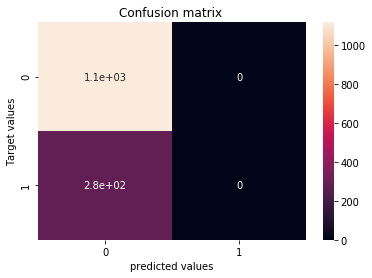

In [19]:
import pylab as pl

ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [20]:
precision=(TP/(TP+FP))
precision

1.0

In [21]:
recall=TP/(TP+FN)
recall

0.7978571428571428

#### prediction on training data

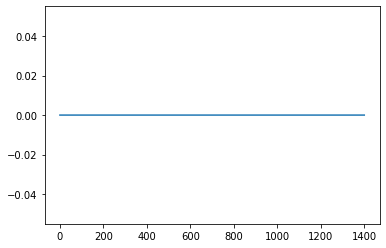

In [22]:
plt.plot(Pocket_Train_pred)

#### prediction on test data

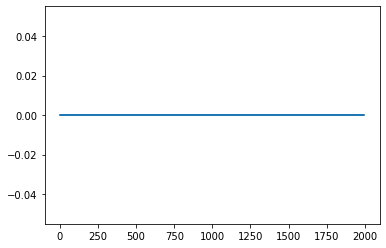

In [23]:
plt.plot(Pocket_Test_pred)

#### Comparison of predicted values and target values of test data

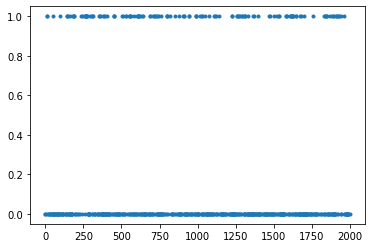

In [146]:
plt.plot(ytest,'.')

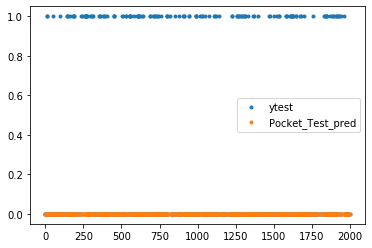

In [147]:
plt.plot(ytest,'.')
plt.plot(Pocket_Test_pred,'.')
plt.legend(['ytest','Pocket_Test_pred'])

#### Evaluation Metrices for Test Data

In [25]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(ytest,Pocket_Test_pred))


Accuracy: 0.7683333333333333


In [26]:
cf=confusion_matrix(ytest, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[461,   0],
       [139,   0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

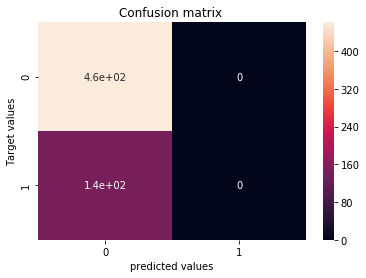

In [27]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [28]:
precision=(TP/(TP+FP))
precision

1.0

In [29]:
recall=TP/(TP+FN)
recall

0.7683333333333333

### ROC Curve ans Score

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, Pocket_Test_pred)

roc_auc=roc_auc_score(ytest, Pocket_Test_pred)

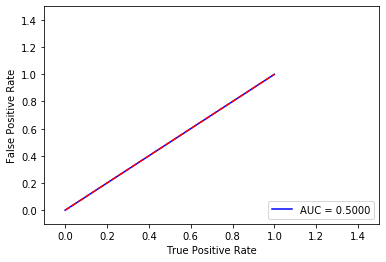

In [29]:
plt.plot(true_positive_rate, false_positive_rate, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

### 2.Experiments for QDA

####  Data Partitioning for QDA and LDA

In [35]:
Data=Cdata.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall'],axis=1)

In [36]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts



The above code is used to partition the data in to 4 different parts 2 of which will ne used for training the model(Xtrain, Ttrain) and rest 2 will be used to test the model(Xtest, Ttest)

In [37]:
Xlst, Tlst = partition(pd.DataFrame(Data), pd.DataFrame(Cdata.RainTomorrow))

In [38]:
Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ttrain, Ttest = [tt.as_matrix() for tt in Tlst]

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [39]:
qda=QDAclass()
qda.train(Xtrain,Ttrain)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(Xtrain)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(Xtest)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


#### Evaluation Metrices for Train Data

In [40]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Ttrain,QDA_Train_pred))


Accuracy: 0.7702586282680169


In [41]:
cf=confusion_matrix(Ttrain, QDA_Train_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[87620,     0],
       [26134,     0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

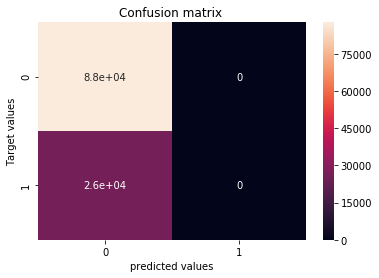

In [42]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [43]:
precision=(TP/(TP+FP))
precision


1.0

In [44]:
recall=TP/(TP+FN)
recall

0.7702586282680169

#### prediction on training data

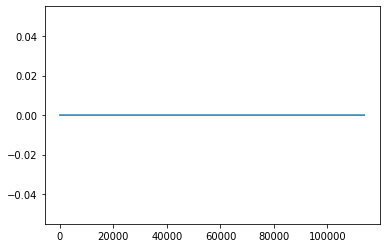

In [45]:
plt.plot(QDA_Train_pred)

#### prediction on test data

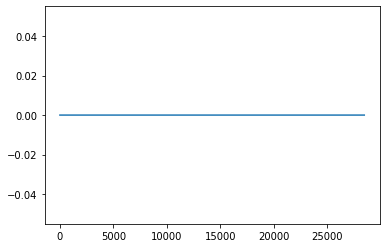

In [46]:
plt.plot(QDA_Test_pred)

#### Comparison of predicted values and target values of test data

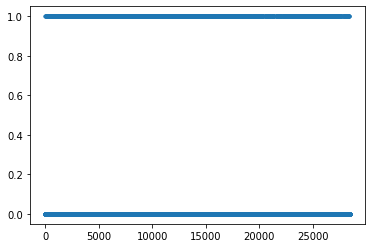

In [144]:
plt.plot(Ttest,'.')

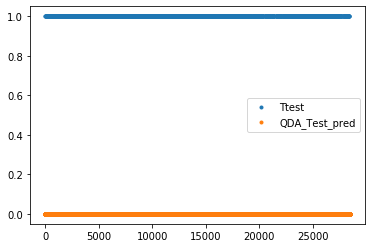

In [145]:
plt.plot(Ttest,'.')
plt.plot(QDA_Test_pred,'.')
plt.legend(['Ttest','QDA_Test_pred'])

#### Evaluation Metrices for Test Data

In [48]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Ttest,QDA_Test_pred))


Accuracy: 0.798059003481135


In [49]:
cf=confusion_matrix(Ttest, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22696,     0],
       [ 5743,     0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

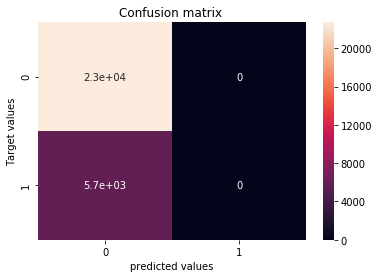

In [50]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [51]:
precision=(TP/(TP+FP))
precision


1.0

In [52]:
recall=TP/(TP+FN)
recall

0.798059003481135

### ROC Score

In [53]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest, QDA_Test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


Text(0.5, 0.92, 'QDA Discriminant Functions')

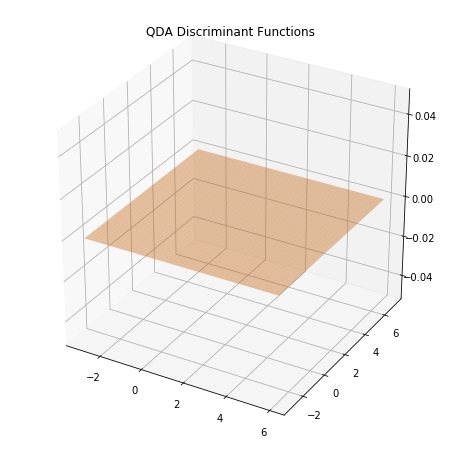

In [183]:

from mpl_toolkits.mplot3d import Axes3D
p,d1,d2=qda.use(Xtest[:10000])
xs, ys = np.meshgrid(np.linspace(-3,6, 100), np.linspace(-3,7, 100))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs,ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys,d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Text(0.5, 1.0, 'Decision Boundary')

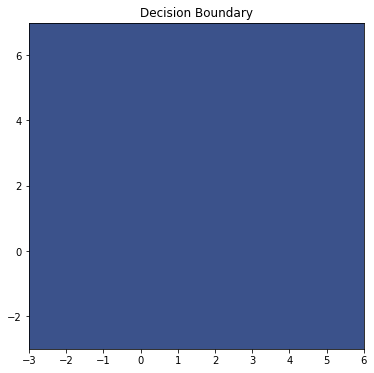

In [184]:

from mpl_toolkits.mplot3d import Axes3D
p,d1,d2=qda.use(Xtest[:10000])
xs, ys = np.meshgrid(np.linspace(-3,6, 100), np.linspace(-3,7, 100))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### 3.Experiments for LDA

In [126]:
lda=LDAclass()
lda.train(Xtrain,Ttrain)

#Prediction on Training Data
LDA_Train_pred,LDA_Train_d1,LDA_Train_d2=lda.use(Xtrain)

#Prediction on Testing Data
LDA_Test_pred,LDA_Test_d1,LDA_Test_d2=lda.use(Xtest)


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater


#### Evaluation Metrices for Train Data

In [127]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Ttrain,LDA_Train_pred))

Accuracy: 0.7702586282680169


In [128]:

cf=confusion_matrix(Ttrain, LDA_Train_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[87620,     0],
       [26134,     0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

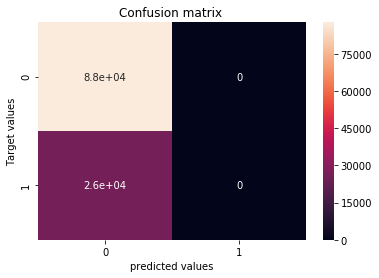

In [129]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [130]:
precision=(TP/(TP+FP))
precision

1.0

In [131]:
recall=TP/(TP+FN)
recall

0.7702586282680169

#### prediction on training data

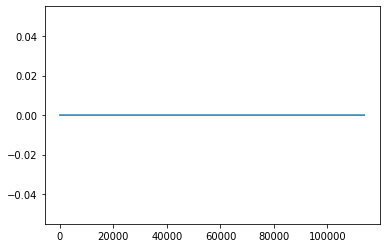

In [132]:
plt.plot(LDA_Train_pred)

#### prediction on test data

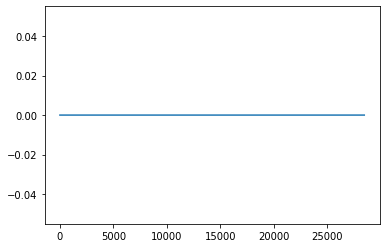

In [133]:
plt.plot(LDA_Test_pred)

#### Comparison of predicted values and target values of test data

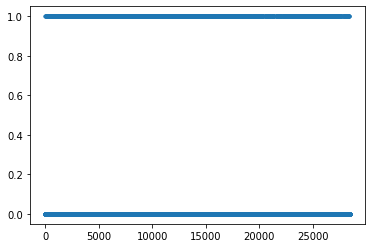

In [149]:
plt.plot(Ttest,'.')

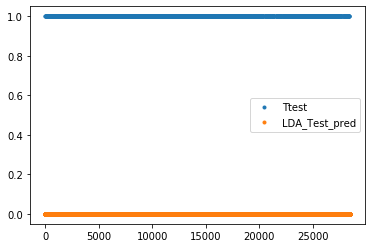

In [148]:
plt.plot(Ttest,'.')
plt.plot(LDA_Test_pred,'.')
plt.legend(['Ttest','LDA_Test_pred'])

#### Evaluation Metrices for Test Data

In [135]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Ttest,LDA_Test_pred))


Accuracy: 0.798059003481135


In [136]:

cf=confusion_matrix(Ttest, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22696,     0],
       [ 5743,     0]], dtype=int64)

Text(33.0, 0.5, 'Target values')

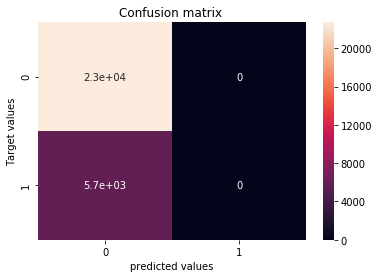

In [137]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [138]:
precision=(TP/(TP+FP))
precision

1.0

In [139]:
recall=TP/(TP+FN)
recall

0.798059003481135

### ROC Score

In [140]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Ttest, LDA_Test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Text(0.5, 1.0, 'Decision Boundary')

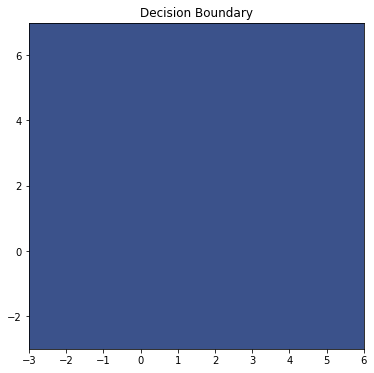

In [141]:

from mpl_toolkits.mplot3d import Axes3D
p,d1,d2=lda.use(Xtest[:10000])
xs, ys = np.meshgrid(np.linspace(-3,6, 100), np.linspace(-3,7, 100))
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")

### Experiments for Logistic Regression

#### Data Partitioning for Logistin Regression

In [151]:
LData=Cdata.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall','RainTomorrow'],axis=1)

In [152]:
lXlst, lTlst = partition(pd.DataFrame(LData), pd.DataFrame(Cdata.RainTomorrow))

In [153]:
lXtrain, lXtest = [xx.as_matrix() for xx in lXlst]
lTtrain, lTtest = [tt.as_matrix() for tt in lTlst]

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [154]:
lr=LogisticRegression(0.00001)
lr.train(lXtrain,lTtrain)

#Prediction on Training Data
y1=lr.use(lXtrain)


#Prediction on Testing Data
y2=lr.use(lXtest)

####  Evaluation Metrices for Train Data

In [155]:
y1 = np.argmax(y1, 1)
y_train=np.array(lTtrain)

In [156]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(y_train,y1))
print('F1 score:', f1_score(y_train,y1))

Accuracy: 0.7943193206392742
F1 score: 0.189602022791036


In [157]:
cf=confusion_matrix(y_train, y1)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[87620,     0],
       [23397,  2737]], dtype=int64)

Text(33.0, 0.5, 'Target values')

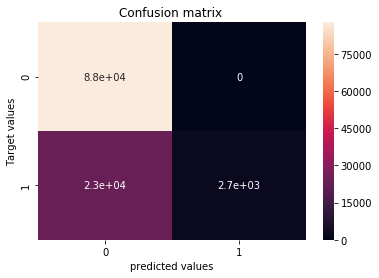

In [158]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [159]:
precision=(TP/(TP+FP))
precision

0.9697090430182498

In [160]:
recall=TP/(TP+FN)
recall

0.7892484934739724

#### prediction on training data

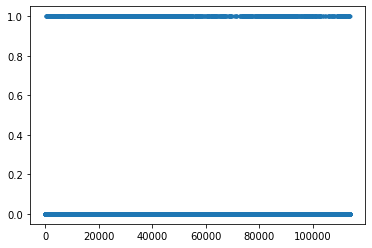

In [161]:
plt.plot(y1,'.')

####  Evaluation Metrices for Test Data

In [162]:
y2 = np.argmax(y2, 1)
y_test=np.array(lTtest)

#### prediction on test data

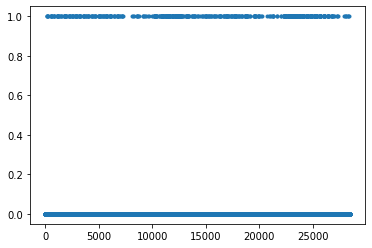

In [163]:
plt.plot(y2,'.')

#### Comparison of predicted values and target values of test data

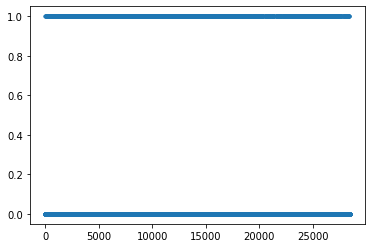

In [164]:
plt.plot(y_test,'.')

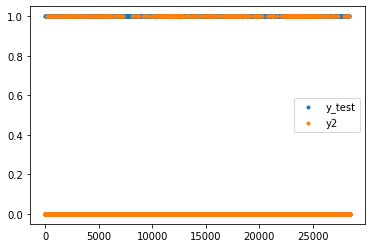

In [165]:
plt.plot(y_test,'.')
plt.plot(y2,'.')
plt.legend(['y_test','y2'])

In [166]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.823798305144344
F1 score: 0.2261003861003861


In [167]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22696,     0],
       [ 5011,   732]], dtype=int64)

Text(33.0, 0.5, 'Target values')

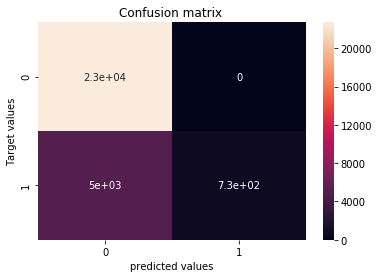

In [168]:
import pylab as pl
import seaborn as sns
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
pl.title('Confusion matrix ')
pl.xlabel('predicted values')
pl.ylabel('Target values')


In [169]:
precision=(TP/(TP+FP))
precision

0.9687553354959877

In [170]:
recall=TP/(TP+FN)
recall

0.8191431768145234

### ROC Curve ans Score

In [171]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
roc_auc_score(y_test, y2)

0.5637297579662197

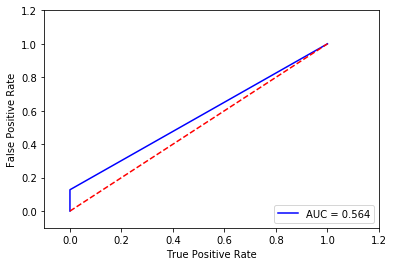

In [172]:
true_positive_rate, false_positive_rate, thresholds = roc_curve(y_test, y2)
roc_auc = auc(true_positive_rate, false_positive_rate)

plt.plot(true_positive_rate, false_positive_rate, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

### Discussion about evaluation metrics:

It is hard to evaluate our algorithms just by their prediction values, there have to be different ways in which we can evaluate them. So we here are evaluating our algorithms with different types of evaluation metrices. We will be evaluating our algorithms on the basis of 'Accuracy', 'Confusion Matrix' we will be calculating precision and recall values on the basis of confusion matrix, we will  also be calculating 'ROC accuracy' and pllotting 'ROC Curve' to get a better idea.<br>

1. Confusion Matrix:<br>
A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B.  compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set.<br> <br>
2. Precision:<br>
The confusion matrix gives you alot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier.<br> $$precision=TP / {TP+FP}$$ wehre TP is true positive and FP is false positive.<br><br>
3. Recall: <br>
 recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier. Precision and recall are typically used together.<br> $$ Recall = TP/{TP+FN}$$ where TP is true positive and FN is false negetive. <br><br>
4. ROC Curve:<br>
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm.<br><br> 

### Discussion about train and test accuracies:

##### 1.Pocket Algorithm:<br>
Results for Training data:<br>
Accuracy: 0.7978571428571428<br>
Precision: 1.0<br>
Recall: 0.7978571428571428<br>

Results for Test data:<br>
Accuracy: 0.7683333333333333<br>
Precision: 1.0<br>
Recall: 0.7683333333333333<br>
ROC Accuracy: 0.5<br><br>
Here we  can see that accuracy on test data slightly decreases than on train data, recall value also slightly dcreases. Which means that the algorithm is not working well on test data as on Train data. So we can say that here pocket algorithm is overfitting abit.<br>

##### 2.QDA Algorithm:<br>
Results for Training data:<br>
Accuracy: 0.7702586282680169<br>
Precision:1.0<br>
Recall:0.7702586282680169<br>

Results for Test data:<br>
Accuracy: 0.798059003481135<br>
Precision: 1.0<br>
Recall: 0.798059003481135<br>
ROC Accuracy: 0.5<br><br>
Here we  can see that accuracy on test data slightly increases than on train data, recall value also slightly increases. Which means that the algorithm is working better on test data than on Train data. So we can say that here QDA algorithm is doing a good job on test data and is classifying well.<br>

##### 3.LDA Algorithm:<br>
Results for Training data:<br>
Accuracy: 0.7702586282680169<br>
Precision:1.0<br>
Recall:0.7702586282680169<br>

Results for Test data:<br>
Accuracy: 0.798059003481135<br>
Precision:1.0<br>
Recall:0.798059003481135<br>
ROC Accuracy: 0.5<br><br>
Here we  can see that accuracy on test data slightly increases than on train data, recall value also slightly increases. Which means that the algorithm is working better on test data than on Train data. So we can say that here QDA algorithm is doing a good job on test data and is classifying well.<br>

##### 4.Logistic Regression Algorithm:<br>
Results for Training data:<br>
Accuracy: 0.7943193206392742<br>
F1 score: 0.189602022791036<br>
Precision:0.9697090430182498<br>
Recall:0.7892484934739724<br>

Results for Test data:<br>
Accuracy: 0.823798305144344<br>
F1 score: 0.2261003861003861<br>
Precision:0.9687553354959877<br>
Recall:0.8191431768145234<br>
ROC Accuracy:0.5637297579662197<br><br>
Here we can see that accuracy on the Test set increases significantly than on the train set also we see and increase in F1 score, Precision and recall values which means that the algorithm is working really well on test data and is able to classify well. We can say that the algorithm is working well.<br>

### Discussions about classificaion model comparison:
On the basis of values of our evaluation metrices for our algorithms we can conclude that Logistic Regression worked best on our data as it has Accuracy, ROC accuracy and recall Values better than other 3 algorithms. On the basis of same evaluation metrices we can say QDA and LDA algorithms works best after Logistic Regression that is they can be our second choice as both of them have same Accuracy, Precision, Recall and ROC accuracy values for our data. The algorithm that worked bad on our data set was Pocket Algorithm as we coud see it worked better on Training data but did not work as expected on testing data, which means it clearly overfitted which is not good.
<br><br>
Values of Evaluation Matrices on our testing dataset are as follows:
<br>
1.Pocket Algorithm:<br>
Accuracy: 0.7683333333333333<br>
Precision: 1.0<br>
Recall: 0.7683333333333333<br>
ROC Accuracy: 0.5<br><br>
2.QDA Algorithm:<br>
Accuracy: 0.798059003481135<br>
Precision: 1.0<br>
Recall: 0.798059003481135<br>
ROC Accuracy: 0.5<br><br>
3.LDA Algorithm:<br>
Accuracy: 0.798059003481135<br>
Precision:1.0<br>
Recall:0.798059003481135<br>
ROC Accuracy: 0.5<br><br>
4.Logistic Regression Algorithm:<br>
Accuracy: 0.823798305144344<br>
F1 score: 0.2261003861003861<br>
Precision:0.9687553354959877<br>
Recall:0.8191431768145234<br>
ROC Accuracy:0.5637297579662197<br><br>

# Conclusions

In this assignment we have Written codes for different classification algorithms like Pocket algorithm, QDA Algorithm, LDA Algorithm, Logistic Regression. We have also evaluated our algorithms with help of different evaluation metrices like precision, recall and accuracy. With the help of these values we can understand and predict that how well are our algorithms working. After implementation of all the algorithms I have come to an conclusion that Logistic Regression works better that other 3 algorithms as it gave good accuracy on the data. The hardest part in this assignment was to figure out the errors that came while implementing algorithms also while running pocket algorithm it took very long if we run it on complete data so I had to reduce the number of rows so as to make it run faster. We can say that, while implementing this assignment we get a fair and good idea about hoe these algorithms work and which one should we choose so that it works better while working with different kinds of data.    

# References

[1] Goodfellow, Ian, et al. Deep Learning. MIT Press, 2016.<br>
[2] Young, Joe. “Rain in Australia.” Kaggle, 3 Dec. 2018, https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/metadata.<br>
[3] Prof.Minwoo J. Lee ,Class Notebooks (Class Notes)<br>
[4] “Sklearn.metrics.roc_curve¶.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html.<br>
[5] hmghalyhmghaly 46022 gold badges1010 silver badges3434 bronze badges, et al. “Sklearn Plot Confusion Matrix with Labels.” Stack Overflow, 1 Jan. 1964, https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785.<br>
[6] “Receiver Operating Characteristic.” Wikipedia, Wikimedia Foundation, 8 Oct. 2019, https://en.wikipedia.org/wiki/Receiver_operating_characteristic.


# Extra Credit

* Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

### 1. Pocket Algorithm

In [89]:
data123=Cdata.iloc[:2000]
t=data123['RainTomorrow']
df1_p=data123.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','WindGustSpeed','Humidity9am','Pressure9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall','RainTomorrow'],axis=1)


In [90]:
#data partitioning
df1_p1=df1_p.iloc[:400]
df1_p2=df1_p.iloc[400:800]
df1_p3=df1_p.iloc[800:1200]
df1_p4=df1_p.iloc[1200:1600]
df1_p5=df1_p.iloc[1600:2000]

In [91]:
#target value partitioning
t1=t.iloc[:400]
t2=t.iloc[400:800]
t3=t.iloc[800:1200]
t4=t.iloc[1200:1600]
t5=t.iloc[1600:2000]

In [92]:
test1=df1_p1
Target_test1=t1
train1=pd.concat([df1_p2,df1_p3,df1_p4,df1_p5])
Target_train1=pd.concat([t2,t3,t4,t5])

test2=df1_p2
Target_test2=t2
train2=pd.concat([df1_p1,df1_p3,df1_p4,df1_p5])
Target_train2=pd.concat([t1,t3,t4,t5])

test3=df1_p3
Target_test3=t3
train3=pd.concat([df1_p1,df1_p2,df1_p4,df1_p5])
Target_train3=pd.concat([t1,t2,t4,t5])

test4=df1_p4
Target_test4=t4
train4=pd.concat([df1_p1,df1_p2,df1_p3,df1_p5])
Target_train4=pd.concat([t1,t2,t3,t5])

test5=df1_p5
Target_test5=t5
train5=pd.concat([df1_p1,df1_p2,df1_p3,df1_p4])
Target_train5=pd.concat([t1,t2,t3,t4])


### Test1

In [93]:
xtrain=np.asarray(train1)
ytrain=np.asarray(Target_train1)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(test1)

End of training:  9


In [94]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(Target_test1,Pocket_Test_pred))


Accuracy: 0.7825


In [95]:
cf=confusion_matrix(Target_test1, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[313,   0],
       [ 87,   0]], dtype=int64)

In [96]:
precision=(TP/(TP+FP))
precision

1.0

In [97]:
recall=TP/(TP+FN)
recall

0.7825

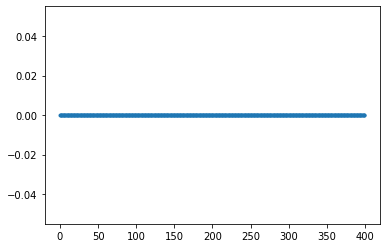

In [98]:
plt.plot(Pocket_Test_pred,'.')

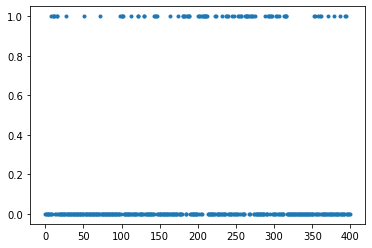

In [99]:
plt.plot(Target_test1,'.')

### Test2

In [100]:
xtrain=np.asarray(train2)
ytrain=np.asarray(Target_train2)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(test2)

End of training:  9


In [101]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(Target_test2,Pocket_Test_pred))


Accuracy: 0.765


In [102]:
cf=confusion_matrix(Target_test2, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[306,   0],
       [ 94,   0]], dtype=int64)

In [103]:
precision=(TP/(TP+FP))
precision

1.0

In [104]:
recall=TP/(TP+FN)
recall

0.765

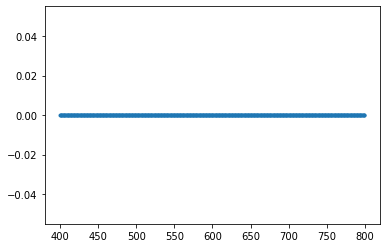

In [105]:
plt.plot(Pocket_Test_pred,'.')

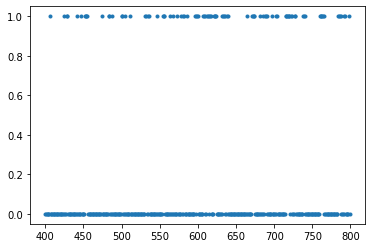

In [106]:
plt.plot(Target_test2,'.')

### Test3

In [107]:
xtrain=np.asarray(train3)
ytrain=np.asarray(Target_train3)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(test3)

End of training:  9


In [108]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(Target_test3,Pocket_Test_pred))


Accuracy: 0.7925


In [109]:
cf=confusion_matrix(Target_test3, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[317,   0],
       [ 83,   0]], dtype=int64)

In [110]:
precision=(TP/(TP+FP))
precision

1.0

In [111]:
recall=TP/(TP+FN)
recall

0.7925

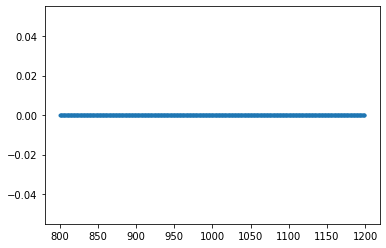

In [112]:
plt.plot(Pocket_Test_pred,'.')

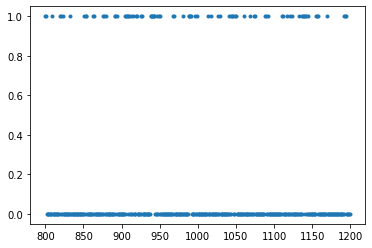

In [113]:
plt.plot(Target_test3,'.')

### Test4

In [114]:
xtrain=np.asarray(train4)
ytrain=np.asarray(Target_train4)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(test4)

End of training:  9


In [115]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(Target_test4,Pocket_Test_pred))


Accuracy: 0.8125


In [116]:
cf=confusion_matrix(Target_test4, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[325,   0],
       [ 75,   0]], dtype=int64)

In [117]:
precision=(TP/(TP+FP))
precision

1.0

In [118]:
recall=TP/(TP+FN)
recall

0.8125

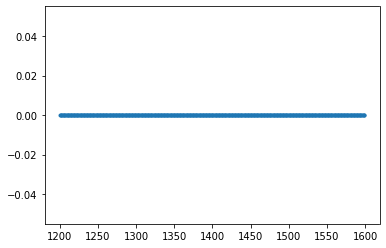

In [119]:
plt.plot(Pocket_Test_pred,'.')

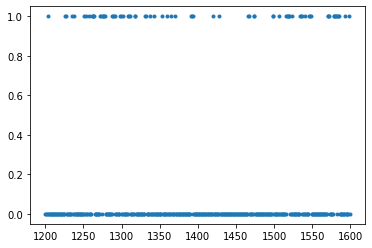

In [120]:
plt.plot(Target_test4,'.')

### Test5

In [121]:
xtrain=np.asarray(train5)
ytrain=np.asarray(Target_train5)
ls = Pocketclass()

ls.train(xtrain, ytrain)

#Prediction on Training Data
Pocket_Train_pred=ls.use(xtrain)

#Prediction on Training Data
Pocket_Test_pred=ls.use(test5)

End of training:  9


In [122]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
#
print('Accuracy:', accuracy_score(Target_test5,Pocket_Test_pred))


Accuracy: 0.7925


In [123]:
cf=confusion_matrix(Target_test5, Pocket_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[317,   0],
       [ 83,   0]], dtype=int64)

In [124]:
precision=(TP/(TP+FP))
precision

1.0

In [125]:
recall=TP/(TP+FN)
recall

0.7925

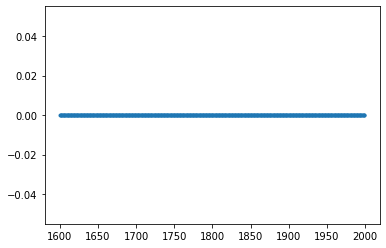

In [126]:
plt.plot(Pocket_Test_pred,'.')

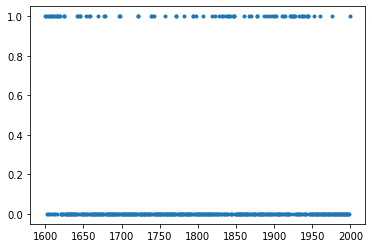

In [127]:
plt.plot(Target_test5,'.')

### QDA Algorithm

In [128]:
Data=Cdata.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall'],axis=1)

In [129]:
t=pd.DataFrame(Cdata.RainTomorrow)

In [130]:
t.shape

(142193, 1)

In [131]:
data1=Data.iloc[:28438]
data2=Data.iloc[28438:56876]
data3=Data.iloc[56876:85314]
data4=Data.iloc[85314:113752]
data5=Data.iloc[113752:142190]

In [132]:
t1=t.iloc[:28438]
t2=t.iloc[28438:56876]
t3=t.iloc[56876:85314]
t4=t.iloc[85314:113752]
t5=t.iloc[113752:142190]

In [133]:
test1=data1.as_matrix()
Target_test1=t1.as_matrix()
train1=pd.concat([data2,data3,data4,data5])
train1=train1.as_matrix()
Target_train1=pd.concat([t2,t3,t4,t5])
Target_train1=Target_train1.as_matrix()

test2=data2.as_matrix()
Target_test2=t2.as_matrix()
train2=pd.concat([data1,data3,data4,data5])
train2=train2.as_matrix()
Target_train2=pd.concat([t1,t3,t4,t5])
Target_train2=Target_train2.as_matrix()

test3=data3.as_matrix()
Target_test3=t3.as_matrix()
train3=pd.concat([data1,data2,data4,data5])
train3=train3.as_matrix()
Target_train3=pd.concat([t1,t2,t4,t5])
Target_train3=Target_train3.as_matrix()

test4=data4.as_matrix()
Target_test4=t4.as_matrix()
train4=pd.concat([data1,data2,data3,data5])
train4=train4.as_matrix()
Target_train4=pd.concat([t1,t2,t3,t5])
Target_train4=Target_train4.as_matrix()

test5=data5.as_matrix()
Target_test5=t5.as_matrix()
train5=pd.concat([data1,data2,data3,data4])
train5=train5.as_matrix()
Target_train5=pd.concat([t1,t2,t3,t4])
Target_train5=Target_train5.as_matrix()

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launc

### Test1

In [134]:
qda=QDAclass()
qda.train(train1,Target_train1)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(train1)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(test1)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [135]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test1,QDA_Test_pred))

Accuracy: 0.7804346297207961


In [136]:
cf=confusion_matrix(Target_test1, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22194,     0],
       [ 6244,     0]], dtype=int64)

In [137]:
precision=(TP/(TP+FP))
precision


1.0

In [138]:
recall=TP/(TP+FN)
recall

0.7804346297207961

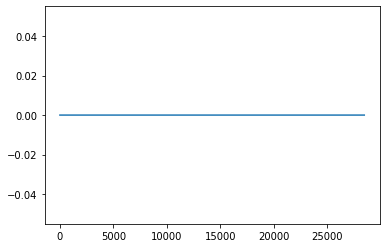

In [139]:
plt.plot(QDA_Test_pred)

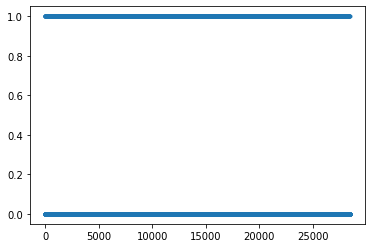

In [140]:
plt.plot(Target_test1,'.')

### Test2

In [141]:
qda=QDAclass()
qda.train(train2,Target_train2)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(train2)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(test2)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [142]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test2,QDA_Test_pred))

Accuracy: 0.7672480483859625


In [143]:
cf=confusion_matrix(Target_test2, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21819,     0],
       [ 6619,     0]], dtype=int64)

In [144]:
precision=(TP/(TP+FP))
precision


1.0

In [145]:
recall=TP/(TP+FN)
recall

0.7672480483859625

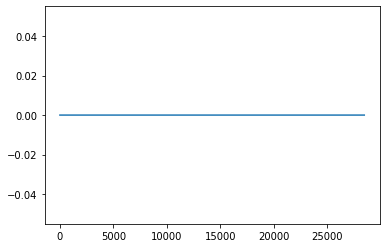

In [146]:
plt.plot(QDA_Test_pred)

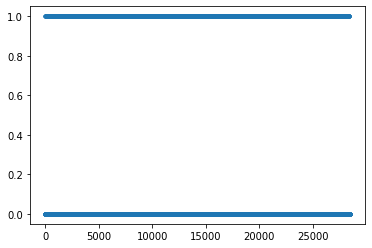

In [147]:
plt.plot(Target_test2,'.')

### Test3

In [148]:
qda=QDAclass()
qda.train(train3,Target_train3)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(train3)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(test3)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [149]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test3,QDA_Test_pred))

Accuracy: 0.7658766439271397


In [150]:
cf=confusion_matrix(Target_test3, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21780,     0],
       [ 6658,     0]], dtype=int64)

In [151]:
precision=(TP/(TP+FP))
precision


1.0

In [152]:
recall=TP/(TP+FN)
recall

0.7658766439271397

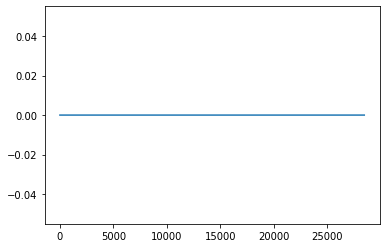

In [153]:
plt.plot(QDA_Test_pred)

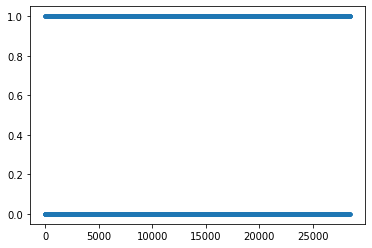

In [154]:
plt.plot(Target_test3,'.')

### Test 4

In [155]:
qda=QDAclass()
qda.train(train4,Target_train4)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(train4)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(test4)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [156]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test4,QDA_Test_pred))

Accuracy: 0.7674941979042127


In [157]:
cf=confusion_matrix(Target_test4, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21826,     0],
       [ 6612,     0]], dtype=int64)

In [158]:
precision=(TP/(TP+FP))
precision


1.0

In [159]:
recall=TP/(TP+FN)
recall

0.7674941979042127

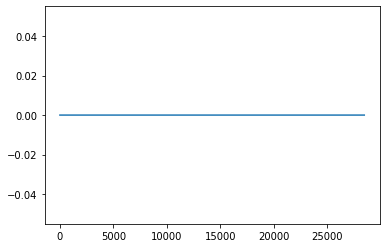

In [160]:
plt.plot(QDA_Test_pred)

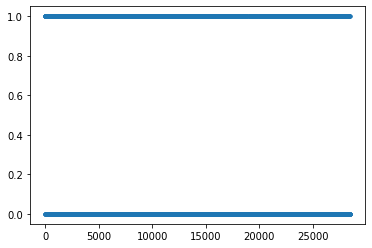

In [161]:
plt.plot(Target_test4,'.')

### Test 5 

In [162]:
qda=QDAclass()
qda.train(train5,Target_train5)

#Prediction on Training Data
QDA_Train_d1,QDA_Train_d2,QDA_Train_pred=qda.use(train5)

#Prediction on Testing Data
QDA_Test_d1,QDA_Test_d2,QDA_Test_pred=qda.use(test5)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [163]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test5,QDA_Test_pred))

Accuracy: 0.7980167381672411


In [164]:
cf=confusion_matrix(Target_test5, QDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22694,     0],
       [ 5744,     0]], dtype=int64)

In [165]:
precision=(TP/(TP+FP))
precision


1.0

In [166]:
recall=TP/(TP+FN)
recall

0.7980167381672411

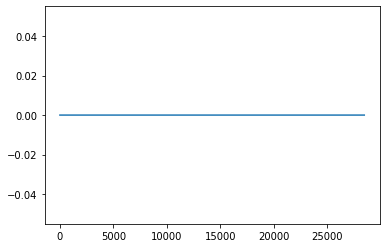

In [167]:
plt.plot(QDA_Test_pred)

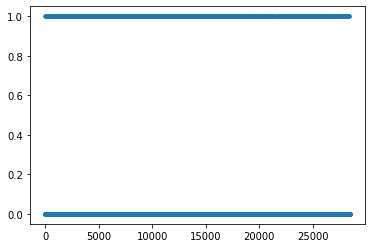

In [168]:
plt.plot(Target_test5,'.')

### LDA

Here we will be using data that we split for QDA.

### Test 1

In [169]:
lda=QDAclass()
lda.train(train1,Target_train1)

#Prediction on Training Data
LDA_Train_d1,LDA_Train_d2,LDA_Train_pred=lda.use(train1)

#Prediction on Testing Data
LDA_Test_d1,LDA_Test_d2,LDA_Test_pred=lda.use(test1)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [170]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test1,LDA_Test_pred))


Accuracy: 0.7804346297207961


In [171]:

cf=confusion_matrix(Target_test1, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22194,     0],
       [ 6244,     0]], dtype=int64)

In [172]:
precision=(TP/(TP+FP))
precision

1.0

In [173]:
recall=TP/(TP+FN)
recall

0.7804346297207961

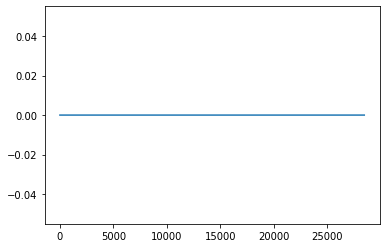

In [174]:
plt.plot(LDA_Test_pred)

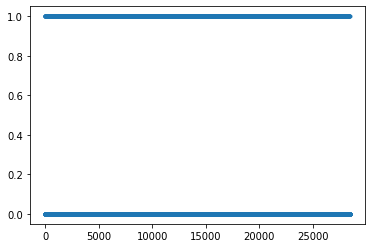

In [175]:
plt.plot(Target_test1,'.')

### Test 2

In [176]:
lda=QDAclass()
lda.train(train2,Target_train2)

#Prediction on Training Data
LDA_Train_d1,LDA_Train_d2,LDA_Train_pred=lda.use(train2)

#Prediction on Testing Data
LDA_Test_d1,LDA_Test_d2,LDA_Test_pred=lda.use(test2)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [177]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test2,LDA_Test_pred))


Accuracy: 0.7672480483859625


In [178]:

cf=confusion_matrix(Target_test2, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21819,     0],
       [ 6619,     0]], dtype=int64)

In [179]:
precision=(TP/(TP+FP))
precision

1.0

In [180]:
recall=TP/(TP+FN)
recall

0.7672480483859625

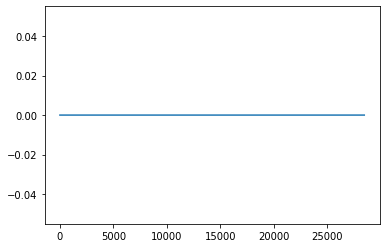

In [181]:
plt.plot(LDA_Test_pred)

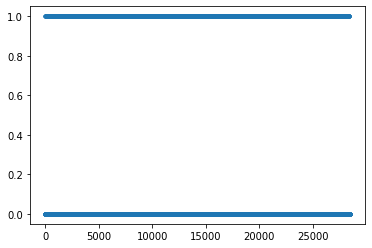

In [182]:
plt.plot(Target_test2,'.')

### Test 3

In [183]:
lda=QDAclass()
lda.train(train3,Target_train3)

#Prediction on Training Data
LDA_Train_d1,LDA_Train_d2,LDA_Train_pred=lda.use(train3)

#Prediction on Testing Data
LDA_Test_d1,LDA_Test_d2,LDA_Test_pred=lda.use(test3)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [184]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test3,LDA_Test_pred))


Accuracy: 0.7658766439271397


In [185]:

cf=confusion_matrix(Target_test3, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21780,     0],
       [ 6658,     0]], dtype=int64)

In [186]:
precision=(TP/(TP+FP))
precision

1.0

In [187]:
recall=TP/(TP+FN)
recall

0.7658766439271397

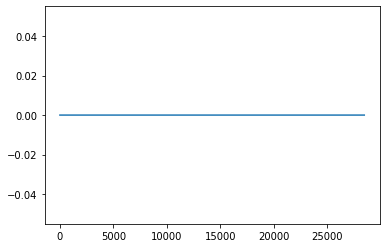

In [188]:
plt.plot(LDA_Test_pred)

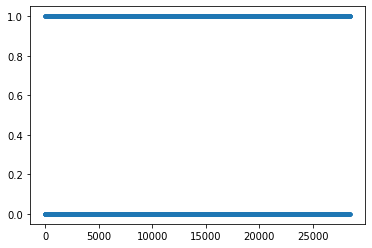

In [189]:
plt.plot(Target_test3,'.')

### Test 4

In [190]:
lda=QDAclass()
lda.train(train4,Target_train4)

#Prediction on Training Data
LDA_Train_d1,LDA_Train_d2,LDA_Train_pred=lda.use(train4)

#Prediction on Testing Data
LDA_Test_d1,LDA_Test_d2,LDA_Test_pred=lda.use(test4)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [191]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test4,LDA_Test_pred))


Accuracy: 0.7674941979042127


In [192]:

cf=confusion_matrix(Target_test4, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21826,     0],
       [ 6612,     0]], dtype=int64)

In [193]:
precision=(TP/(TP+FP))
precision

1.0

In [194]:
recall=TP/(TP+FN)
recall

0.7674941979042127

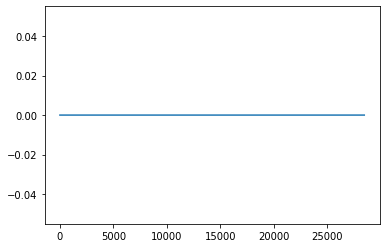

In [195]:
plt.plot(LDA_Test_pred)

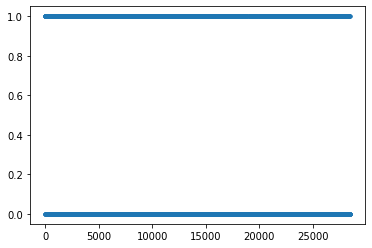

In [196]:
plt.plot(Target_test4,'.')

### Test 5

In [197]:
lda=QDAclass()
lda.train(train5,Target_train5)

#Prediction on Training Data
LDA_Train_d1,LDA_Train_d2,LDA_Train_pred=lda.use(train5)

#Prediction on Testing Data
LDA_Test_d1,LDA_Test_d2,LDA_Test_pred=lda.use(test5)

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


In [198]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score
print('Accuracy:', accuracy_score(Target_test5,LDA_Test_pred))


Accuracy: 0.7980167381672411


In [199]:

cf=confusion_matrix(Target_test5, LDA_Test_pred)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22694,     0],
       [ 5744,     0]], dtype=int64)

In [200]:
precision=(TP/(TP+FP))
precision

1.0

In [201]:
recall=TP/(TP+FN)
recall

0.7980167381672411

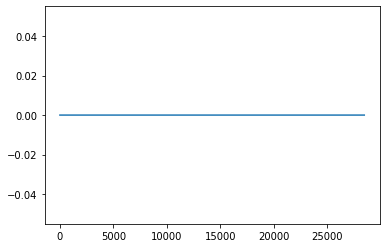

In [202]:
plt.plot(LDA_Test_pred)

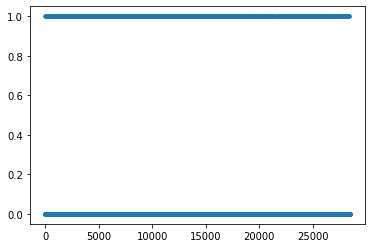

In [203]:
plt.plot(Target_test5,'.')

### Logistic Regression

### Test 1

In [204]:
LData=Cdata.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall','RainTomorrow'],axis=1)

In [205]:
t=pd.DataFrame(Cdata.RainTomorrow)

In [206]:
ldata1=LData.iloc[:28438]
ldata2=LData.iloc[28438:56876]
ldata3=LData.iloc[56876:85314]
ldata4=LData.iloc[85314:113752]
ldata5=LData.iloc[113752:142190]


In [207]:
t1=t.iloc[0:28438,:]
t2=t.iloc[28438:56876,:]
t3=t.iloc[56876:85314,:]
t4=t.iloc[85314:113752,:]
t5=t.iloc[113752:142190,:]

In [208]:
test1=ldata1.as_matrix()
Target_test1=t1.as_matrix()
train1=pd.concat([ldata2,ldata3,ldata4,ldata5])
train1=train1.as_matrix()
Target_train1=pd.concat([t2,t3,t4,t5])
Target_train1=Target_train1.as_matrix()

test2=ldata2.as_matrix()
Target_test2=t2.as_matrix()
train2=pd.concat([ldata1,ldata3,ldata4,ldata5])
train2=train2.as_matrix()
Target_train2=pd.concat([t1,t3,t4,t5])
Target_train2=Target_train2.as_matrix()

test3=ldata3.as_matrix()
Target_test3=t3.as_matrix()
train3=pd.concat([ldata1,ldata2,ldata4,ldata5])
train3=train3.as_matrix()
Target_train3=pd.concat([t1,t2,t4,t5])
Target_train3=Target_train3.as_matrix()

test4=ldata4.as_matrix()
Target_test4=t4.as_matrix()
train4=pd.concat([ldata1,ldata2,ldata3,ldata5])
train4=train4.as_matrix()
Target_train4=pd.concat([t1,t2,t3,t5])
Target_train4=Target_train4.as_matrix()

test5=ldata5.as_matrix()
Target_test5=t5.as_matrix()
train5=pd.concat([ldata1,ldata2,ldata3,ldata4])
train5=train5.as_matrix()
Target_train5=pd.concat([t1,t2,t3,t4])
Target_train5=Target_train5.as_matrix()

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launc

In [209]:
lr=LogisticRegression(0.00001)
lr.train(train1,Target_train1)

#Prediction on Training Data
y1=lr.use(train1)


#Prediction on Testing Data
y2=lr.use(test1)

In [210]:
y2 = np.argmax(y2, 1)
y_test=np.array(Target_test1)

In [211]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.807933047331036
F1 score: 0.2226017648733277


In [212]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22194,     0],
       [ 5462,   782]], dtype=int64)

In [213]:
precision=(TP/(TP+FP))
precision

0.9659644846796658

In [214]:
recall=TP/(TP+FN)
recall

0.8025021695111368

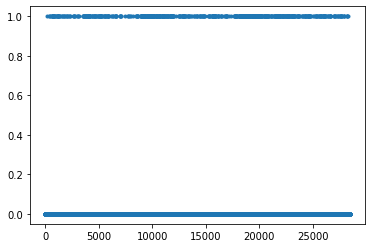

In [215]:
plt.plot(y2,'.')

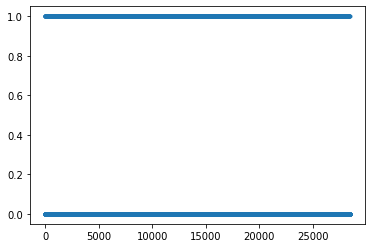

In [216]:
plt.plot(y_test,'.')

### Test 2

In [217]:
lr=LogisticRegression(0.00001)
lr.train(train2,Target_train2)

#Prediction on Training Data
y1=lr.use(train2)


#Prediction on Testing Data
y2=lr.use(test2)

In [218]:
y2 = np.argmax(y2, 1)
y_test=np.array(Target_test2)

In [219]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.7968211547928827
F1 score: 0.22546916890080426


In [220]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21819,     0],
       [ 5778,   841]], dtype=int64)

In [221]:
precision=(TP/(TP+FP))
precision

0.9628861429832304

In [222]:
recall=TP/(TP+FN)
recall

0.7906294162408958

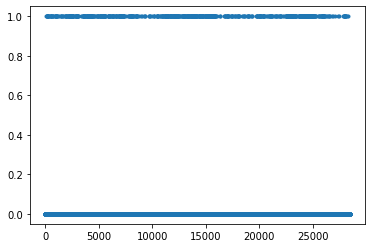

In [223]:
plt.plot(y2,'.')

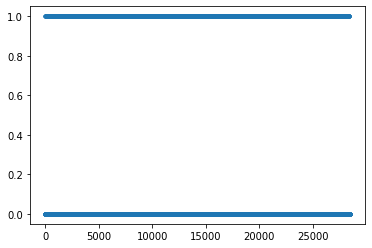

In [224]:
plt.plot(y_test,'.')

### Test 3

In [225]:
lr=LogisticRegression(0.00001)
lr.train(train3,Target_train3)

#Prediction on Training Data
y1=lr.use(train3)


#Prediction on Testing Data
y2=lr.use(test3)

In [226]:
y2 = np.argmax(y2, 1)
y_test=np.array(Target_test3)

In [227]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.7872916520149096
F1 score: 0.1676069905050227


In [228]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21780,     0],
       [ 6049,   609]], dtype=int64)

In [229]:
precision=(TP/(TP+FP))
precision

0.9727991424360177

In [230]:
recall=TP/(TP+FN)
recall

0.7826368177081462

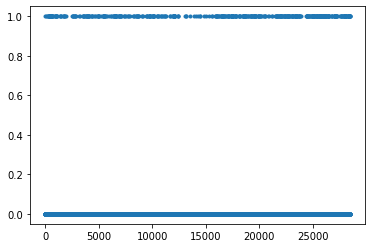

In [231]:
plt.plot(y2,'.')

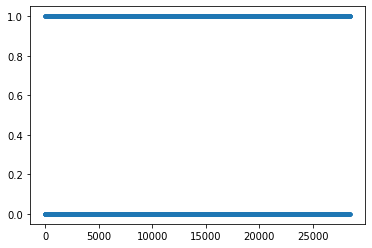

In [232]:
plt.plot(y_test,'.')

### Test 4

In [233]:
lr=LogisticRegression(0.00001)
lr.train(train4,Target_train4)

#Prediction on Training Data
y1=lr.use(train4)


#Prediction on Testing Data
y2=lr.use(test4)

In [234]:
y2 = np.argmax(y2, 1)
y_test=np.array(Target_test4)

In [235]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.7892608481609115
F1 score: 0.17120730189462038


In [236]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[21826,     0],
       [ 5993,   619]], dtype=int64)

In [237]:
precision=(TP/(TP+FP))
precision

0.9724214747159724

In [238]:
recall=TP/(TP+FN)
recall

0.7845716956037241

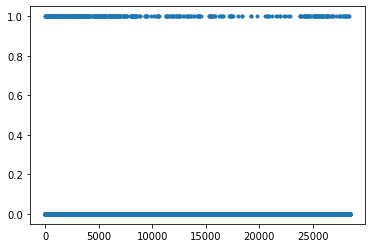

In [239]:
plt.plot(y2,'.')

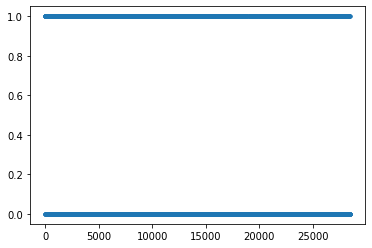

In [240]:
plt.plot(y_test,'.')

### Test data 5

In [241]:
lr=LogisticRegression(0.00001)
lr.train(train5,Target_train5)

#Prediction on Training Data
y1=lr.use(train5)


#Prediction on Testing Data
y2=lr.use(test5)

In [242]:
y2 = np.argmax(y2, 1)
y_test=np.array(Target_test5)

In [243]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test,y2))
print('F1 score:', f1_score(y_test,y2))

Accuracy: 0.8237569449328364
F1 score: 0.22606547251389744


In [244]:
cf=confusion_matrix(y_test, y2)
TP=cf[0][0]
TN=cf[0][1]
FN=cf[1][0]
FP=cf[1][1]

cf

array([[22694,     0],
       [ 5012,   732]], dtype=int64)

In [245]:
precision=(TP/(TP+FP))
precision

0.9687526679757534

In [246]:
recall=TP/(TP+FN)
recall

0.8191005558362809

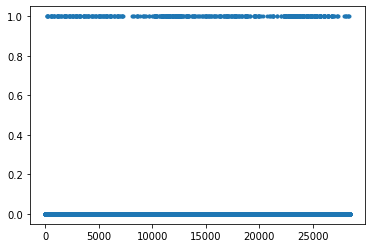

In [247]:
plt.plot(y2,'.')

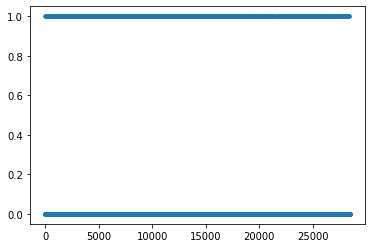

In [248]:
plt.plot(y_test,'.')

### Observation:
From above all test cases on all the algorithms we implemented above, we can see that Linear Regression algorithm works best for my dataset. Also we observe that we get significantly good accuracy on few train cases, which shows that partitioning data in 5 parts helped us to find a better training data which in returned helped us to train our model and get good prediction values.  